<a href="https://colab.research.google.com/github/sureshakukkaje/Python/blob/master/MultilayerPerceptronModel_Keras_MNIST_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Introduction**

**Artificial Intelligence, Machine Learning, Deep Learning & Data Science**

In [63]:
from IPython.display import Image
Image(url='https://qph.fs.quoracdn.net/main-qimg-86c2b831abdd635d8947a371eb159895')

**Artificial Intelligence** (AI) is any technique, code or algorithm that enables machines to develop, demonstrate and mimic human cognitive behavior or intelligence and hence the name “Artificial Intelligence”.

In [64]:
from IPython.display import Image
Image(url='https://miro.medium.com/max/2560/1*2qqjQQ0wW37Lbvkx50zPxg.jpeg')

**Machine Learning** is the sub field of AI, which gives machines the ability to improve its performance over time without explicit intervention or help from the human being. Most of the current applications of the machine learning leverage supervised learning.

In [65]:
from IPython.display import Image
Image(url='https://miro.medium.com/max/892/0*P7pskqJakAFZhF5o.png')


**Deep Learning** is a sub field of Machine Learning that very closely tries to mimic human brain's working using neurons. These techniques focus on building Artificial Neural Networks (ANN) using several hidden layers. Using different weights, biases, # of neurons, activation functions ( Relu, Sigmoid..) and optimizers (SGD, Adam) etc. the Deep Neural Networks tries to come out with the best possible outcome for the given problem.

In [66]:
from IPython.display import Image
Image(url='https://qphs.fs.quoracdn.net/main-qimg-7459ff9a3bafbfe2ffd59cc5ff70588f.webp')

**Key Terms of Deep Learning**

In [67]:
from IPython.display import Image
Image(url='https://www.kdnuggets.com/wp-content/uploads/neural-networks-layers.jpg')

In [68]:
from IPython.display import Image
Image(url='https://qphs.fs.quoracdn.net/main-qimg-9779e1c5f3fd597e6eeec66dad83b7b8.webp')

**Data Science**

Data Science is a field which intersects AI, Machine Learning and Deep Learning and enables statistically driven decision making. Data science is the Art and Science of drawing actionable insights from the data.

In [69]:
from IPython.display import Image
Image(url='https://qphs.fs.quoracdn.net/main-qimg-1e9d0320f2feb6d7a6d1e1939bb8a979.webp')

In [70]:
# Check Python Version
import sys
sys.version
sys.version_info
import platform
print(platform.python_version())

'3.6.8 (default, Jan 14 2019, 11:02:34) \n[GCC 8.0.1 20180414 (experimental) [trunk revision 259383]]'

sys.version_info(major=3, minor=6, micro=8, releaselevel='final', serial=0)

3.6.8


**Keras** allows to define and train neural network models.

**Sequential** allows to build NNs like legos, by adding one layer on top of the other, swapping layers in and out.

In [71]:
# Check Keras and Tensorflow environment
import os
os.environ["KERAS_BACKEND"] = "tensorflow"
# tensorflow
import tensorflow
print('tensorflow: %s' % tensorflow.__version__)
# keras
import keras
print('keras: %s' % keras.__version__)

tensorflow: 1.14.0
keras: 2.2.5


In [0]:
# import libaries
from keras.models import Sequential
from keras.layers import Dense, Activation, Embedding, LSTM, Dropout, advanced_activations
from keras.callbacks import ModelCheckpoint, TensorBoard
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix, average_precision_score, recall_score
import seaborn as sns
import matplotlib.gridspec as gridspec
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn import metrics
from sklearn.metrics import roc_curve, auc,recall_score,precision_score,accuracy_score,f1_score
%matplotlib inline
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

In [0]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [0]:
# Import data
df = pd.read_csv('mnist_test.csv')

In [75]:
# Investigate Data
type(df)
df.size
df.shape
df.head()
df.tail()

pandas.core.frame.DataFrame

7850000

(10000, 785)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,label
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,label
9995,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9
9996,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9997,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4
9998,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8
9999,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4


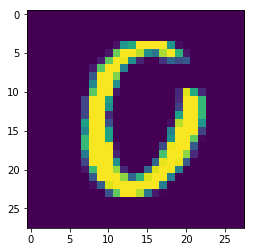

In [76]:
sample_row=3

sample_row=df.iloc[sample_row,:-1]
transformed_row=sample_row.values.reshape(28,28)

import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(transformed_row)
plt.show();

In [0]:
# Create Features and Labels and Standardize data
Y = df.loc[:,'label']
X= df.iloc[:,0:784]
std = StandardScaler()
X_Features= std.fit_transform(X)

In [78]:
# Create train and test data 85% and 15% split
train_x, test_x, train_y, test_y = train_test_split(X_Features, Y, test_size=0.15, random_state=1)
train_x.shape
test_x.shape
train_y.shape
test_y.shape
type(train_x)

(8500, 784)

(1500, 784)

(8500,)

(1500,)

numpy.ndarray

Models in Keras are defined as a sequence of layers.

The model expects rows of data with 784 variables (the input_dim=784 argument)

The first hidden layer has 512 nodes and uses the relu activation function.

The second hidden layer has 256 nodes and uses the relu activation function.

The Third hidden layer has 128 nodes and uses the relu activation function.

The Fourth hidden layer has 64 nodes and uses the relu activation function.

The output layer has 10 node and uses the softmax activation function.

In [0]:
# Build Deep Learning Model
model = Sequential()
model.add(Dense(512, input_dim =784))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(10))
model.add(Activation('softmax'))
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [0]:
train_x = np.array(train_x)
train_y = np.array(train_y)

In Fit Keras Model, we can train or fit our model on our loaded data by calling the fit() function on the model.

Epoch is ne pass through all of the rows in the training dataset. Batch is one or more samples considered by the model within an epoch before weights are updated.

In [81]:
# Fit the model
model.fit(train_x,train_y, epochs=15, batch_size = 60)

Epoch 1/15
8500/8500 [==============================] - 2s 219us/step - loss: 0.7534 - acc: 0.7612
Epoch 2/15
8500/8500 [==============================] - 1s 114us/step - loss: 0.2904 - acc: 0.9146
Epoch 3/15
8500/8500 [==============================] - 1s 117us/step - loss: 0.2157 - acc: 0.9358
Epoch 4/15
8500/8500 [==============================] - 1s 116us/step - loss: 0.1691 - acc: 0.9521
Epoch 5/15
8500/8500 [==============================] - 1s 117us/step - loss: 0.1316 - acc: 0.9604
Epoch 6/15
8500/8500 [==============================] - 1s 113us/step - loss: 0.1123 - acc: 0.9673
Epoch 7/15
8500/8500 [==============================] - 1s 112us/step - loss: 0.1085 - acc: 0.9676
Epoch 8/15
8500/8500 [==============================] - 1s 119us/step - loss: 0.0878 - acc: 0.9753
Epoch 9/15
8500/8500 [==============================] - 1s 118us/step - loss: 0.0894 - acc: 0.9767
Epoch 10/15
8500/8500 [==============================] - 1s 116us/step - loss: 0.0643 - acc: 0.9814
Epoch 11/

In [82]:
# evaluate the model
scores = model.evaluate(test_x, test_y)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

1500/1500 [==============================] - 0s 243us/step

acc: 96.40%


Evaluate Keras Model can evaluate the model on the training dataset using the evaluate() function on the model and pass it the input and output used to train the model.


**Accuracy of the model achieved with train and test data 85% and 15% split is 96.4%**